<a href="https://colab.research.google.com/github/EricRaniere/DataScienceNaPratica/blob/main/AnaliseAirbnbn/AnaliseAirbnbAmsterdan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![author](https://img.shields.io/badge/author-ericcosta-red.svg)](https://www.linkedin.com/in/eric-raniere-costa) [![](https://img.shields.io/badge/python-3.7+-blue.svg)](https://www.python.org/downloads/release/python-365/) [![GPLv3 license](https://img.shields.io/badge/License-GPLv3-blue.svg)](http://perso.crans.org/besson/LICENSE.html) [![contributions welcome](https://img.shields.io/badge/contributions-welcome-brightgreen.svg?style=flat)](https://github.com/EricRaniere/Projetos-Estudos/tree/main/DSNP)

  <img alt="Colaboratory logo" width="100%" src="https://raw.githubusercontent.com/EricRaniere/Projetos-Estudos/main/Banner.jpg">

---

O [Airbnb](https://news.airbnb.com/about-us/) é hoje a principal plataforma de compartilhamento e oferta de hospedagem do mundo. 

O [negócio](https://news.airbnb.com/about-us/) criado em 2007 é atualmente responsável por **5.6 milhões de anúncios ativos** de hospedagem espalhados por **100.000 cidades** em mais de **220 países**.

Sua rede hoje conta com mais de **4 milhões de Anfitriões**, pessoas que oferencem seus imóveis na plataforma, gerando uma receita média de **$7.900,00 por ano** para cada Anfitrião. 

Uma das iniciativas mais interessantes do Airbnb é o fato da empresa disponibilizar dados da sua plataforma para fomentar o estudo e desenvolvimento de insights. Os dados disponibilizados são previamente tratados e anonimizados, evitando a quebra de sigilo dos seus usuários. Todos os dados estão públicados na plataforma [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Nesse notebook vou realizar a primeira tarefa do curso **Data Science na Prática** da **[Sigmoidal](https://sigmoidal.ai/)** e analisar os dados da cidade de **Amsterdã**, a idéia é extrair o máximo de insights relevantes sobre a base de dados.



<img alt="Colaboratory" width="100%" src="https://raw.githubusercontent.com/EricRaniere/DataScienceNaPratica/main/AnaliseAirbnbn/AmsterdamImage.jpeg">


## Sobre a Cidade de Amsterdã

Amsterdã é a capital comercial e cultural dos Países Baixos, a sede do governo fica em outra cidade chamada Haia, aqui já temos o primeiro fato curioso, Países Baixos é o nome oficial do país, Holanda como muitos conhecem é o nome de uma província que existiu na região durante o século XVII. Fica então esse aprendizado caso você não soubesse disso.

Já foi considerada em 2012 como a segunda melhor cidade para se viver pela Economist Intelligence Unit. Portanto podemos dizer que é uma cidade cosmopolita, global e pujante. Essas características são interessantes para o nosso projeto, tendo em vista que devem afetar diretamente o fluxo e número de opções de hospedagens.

Curiosidade #2. O nome Amsterdã/Amsterdão, tem como origem em tradução livre "homens que vivem próximo ao Amstelledamme", Amstelledamme é um dique do rio Amstel. 

Ao buscar informações de roteiro e hospedagem na cidade, nota-se que a grande maioria das dicas se concentra em estadias de até 3 dias, para se conhecer a cidade.

Será interessante verificar se isso se reflete na nossa base de dados.

Curiosidade #3. Exitem nomes famosos que estão diretamente ligados a cidade, entre eles temos. Anne Frank, os artistas Rembrandt e Vincent van Gogh e o filósofo Baruch Spinoza.

Curiosidade #4. A bolsa de valores de Amsterdã é a mais antiga do mundo.

Curiosidade #5. As principais atrações são os seus canais fluviais, o Museu Van Gogh, Stedelijk Museum, Hermitage Amsterdam, Casa de Anne Frank, Museu de Amsterdã. A zona de meretício, e os seus diversos coffeeshops.

A cidade atrai aproximadamente 5 milhões de  visitantes por ano e em 2018 ficou entres as [25 cidades mais visitadas do mundo]("https://www.iamexpat.nl/expat-info/dutch-expat-news/amsterdam-top-25-most-visited-cities-world"), ficando com a 23a posição com um mais de 8 milhoes de visitante. 



## Obtenção dos Dados





Para a análise exploratória inicial, irei utilizar o seguinte arquivo:

* `listings.csv`
 


In [6]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


%matplotlib inline

Para viabilizar a visualização desse trabalho em qualquer época ou ano, hospedei o arquivo no meu repositório do GitHub

In [7]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/EricRaniere/DataScienceNaPratica/main/AnaliseAirbnbn/listings.csv")

## Análise dos Dados
Nessa etapa vou buscar entender como os dados estão estruturados e buscar relacionar a que cada variável esta associada.


* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


In [8]:
# mostrar as 5 primeiras entradas
df.head(5)

id                                               name  host_id  \
0   2818           Quiet Garden View Room & Super Fast WiFi     3159   
1  20168       Studio with private bathroom in the centre 1    59484   
2  25428  Lovely, 1 bed apt in Ctr (w.lift) -3/20-6/20(f...    56142   
3  27886  Romantic, stylish B&B houseboat in canal district    97647   
4  28871                            Comfortable double room   124245   

   host_name  neighbourhood_group                           neighbourhood  \
0     Daniel                  NaN  Oostelijk Havengebied - Indische Buurt   
1  Alexander                  NaN                            Centrum-Oost   
2       Joan                  NaN                            Centrum-West   
3       Flip                  NaN                            Centrum-West   
4      Edwin                  NaN                            Centrum-West   

   latitude  longitude        room_type  price  minimum_nights  \
0  52.36435    4.94358     Private room     59               3   
1  52.36407    4.89393     Private room    200               1   
2  52.37490    4.88487  Entire home/apt    125              14   
3  52.38761    4.89188     Private room    141               2   
4  52.36775    4.89092     Private room     75               2   

   number_of_reviews last_review  reviews_per_month  \
0                278  2020-02-14               1.90   
1                339  2020-04-09               2.50   
2                  5  2020-02-09               0.13   
3                219  2020-07-25               1.94   
4                336  2020-09-20               2.59   

   calculated_host_listings_count  availability_365  
0                               1               152  
1                               2                 0  
2                               2               132  
3                               1                66  
4                               2               335

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Parte importante da análise exploratória de dados é identificar qual o formato do conjunto de dados. Para isso precisamos buscar entender quantas entradas, quantas váriaveis e qual o tipo de variáveis estão disponíveis. Caso algo não esteja de acordo com o tipo de entrada, é nesse momento que pode ser feita a correção.

Um exemplo é quando a entrada de Data não vêm no formato Datetime, oque inviabiliza a organização dos dados por ordem cronológica.



In [9]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 17825
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Valores ausentes refletem a qualidade do conjunto de dados. Com o código abaixo será possível verificar se há uma grande quantidade de dados ausentes, e quais precisam ou podem ser ignorados.

In [10]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
last_review                       0.134642
reviews_per_month                 0.134642
host_name                         0.033380
name                              0.001795
id                                0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

#### Q2.1 Eliminar colunas com dados totalmente ausentes
Com o comando anterior temos a conclusão de que a coluna `neighbourhood_group`pode ser eliminada do nosso DataSet, tendo em vista que essa coluna não possui nenhuma entrada.

In [11]:
#criando uma cópia do DF para limpeza. Objetivo de ter um backup.
df_clean=df.copy()

#eliminando a coluna neighbourhood_group, que está totalmente vazia
df_clean.drop('neighbourhood_group',axis=1,inplace=True)

# ordenar novamente em ordem decrescente as variáveis por seus valores ausentes
(df_clean.isnull().sum() / df_clean.shape[0]).sort_values(ascending=False)


last_review                       0.134642
reviews_per_month                 0.134642
host_name                         0.033380
name                              0.001795
id                                0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

É sempre interessante entender como as variáveis estão distribuidas, quando elas estão concentradas em um lado muito destacado de histograma podemos entender que é necessária uma análise mais profunda para detectar dados `outliers`, fora do padrão.

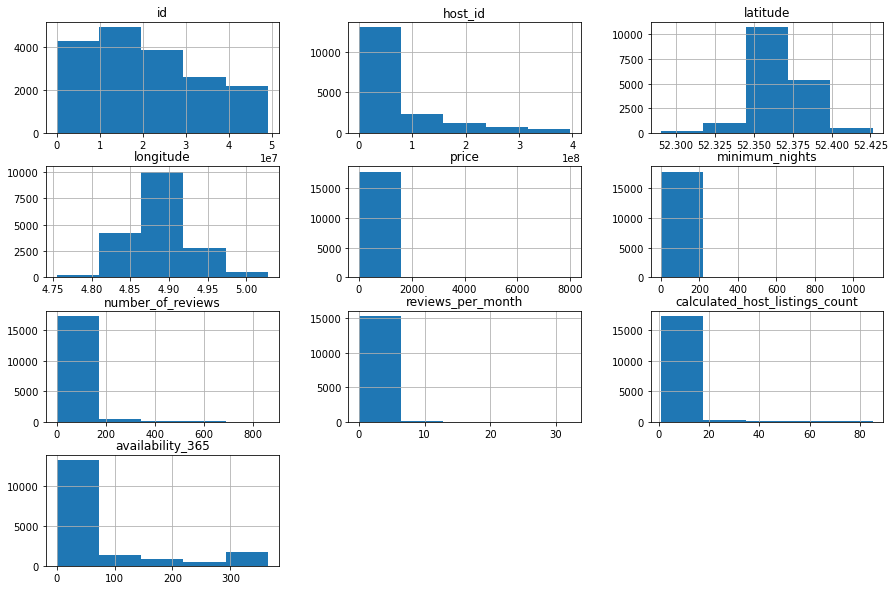

In [12]:
# plotar o histograma das variáveis numéricas
df_clean.hist(bins=5,figsize=(15,10));

####Q.3.1 Verificando Outliers
Com os Histogramas foi possível verificar que existem `outliers` no nosso dataset. Em especial nas colunas `price`, `minimum_nights`, `number_of_reviews`, `reviews_per_month`, `calculated_host_listings_count`.




In [13]:
df_clean[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count']].describe()

price  minimum_nights  number_of_reviews  reviews_per_month  \
count  17825.000000    17825.000000       17825.000000       15425.000000   
mean     154.495877        3.867041          23.952875           0.562200   
std      154.162566       18.732039          54.831150           1.017706   
min        0.000000        1.000000           0.000000           0.010000   
25%       95.000000        2.000000           2.000000           0.120000   
50%      129.000000        2.000000           8.000000           0.260000   
75%      180.000000        3.000000          21.000000           0.540000   
max     8000.000000     1100.000000         860.000000          32.190000   

       calculated_host_listings_count  
count                    17825.000000  
mean                         2.684376  
std                          8.813855  
min                          1.000000  
25%                          1.000000  
50%                          1.000000  
75%                          1.000000  
max                         85.000000

Algumas análises podem ser feitas com os dados acima.

A média de valores da coluna `price` é de 154.162 e 75% dos seus valores estão no valor de até 180.00 porém seu valor máximo chegou a 8000.00 

Mesma análise pode ser realizada na coluna `minimum_nights`, sua mediana é de 3.86 e 75% dos seus valores estão em até 3 diárias, mas seu valor máximo é de 1100.

## Limpando Outliers

Para tratar dos outliers desse conjunto de dados, iremos analisar a distribuição estatística, plotar boxplots e calcular os limites utilizando a regra do IQR Score.

Primeiramente, vamos lembrar o que é o IQR.

O IQR é calculado subtraindo o Terceiro Quartil (75%) pelo Primeiro Quartil (25%).

# IQR = Q3 - Q1

Vamos dar uma olhada nos nossos dados e ver o que identificamos.

Verificando os histogramas, conseguimos ver claramente que temos outliers presentes. Para tratá-los vamos seguir os seguintes passos:

* Definir o Q1 e Q3 para as variáveis que serão limpas.
* Calcular o IQR para as variáveis.
* Definir o limite superior e inferior para cortar os outliers.
* Remover os outliers.

##### Q.3.1.1 Minimum Nights

In [14]:
# identificando os outliers para a variável minimum nights
q1_minimumnights = df_clean.minimum_nights.quantile(.25)
q3_minimumnights = df_clean.minimum_nights.quantile(.75)
IQR_minimumnights = q3_minimumnights - q1_minimumnights
print('IQR da variável minimumnights: ', IQR_minimumnights)

# definindo os limites                                       
sup_minimumnights = q3_minimumnights + 1.5 * IQR_minimumnights
inf_minimumnights = q1_minimumnights - 1.5 * IQR_minimumnights

print('Limite superior de minimum nights: ', sup_minimumnights)
print('Limite inferior de minimum nights: ', inf_minimumnights)


IQR da variável minimumnights:  1.0
Limite superior de minimum nights:  4.5
Limite inferior de minimum nights:  0.5


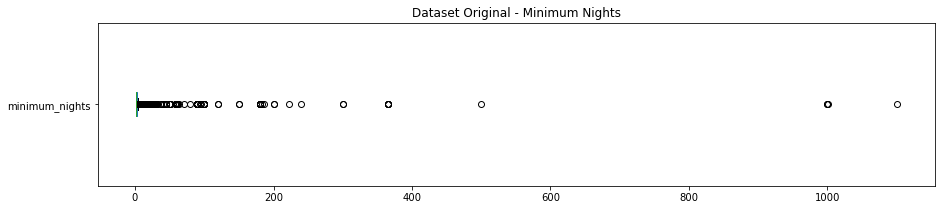

O dataset possui 17825 entradas
2349 Entradas acima de 4.5
Representam 13.18% do dataset


In [15]:
#verificando outliers com Box_plot
#minimum_nights
fig, ax = plt.subplots(figsize=(15,3))
df_clean.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Original - Minimum Nights')
plt.show()
print("O dataset possui {} entradas".format(df_clean.shape[0]))
print("{} Entradas acima de 4.5".format(len(df_clean[df_clean.minimum_nights > 4.5])))
print("Representam {:.2f}% do dataset".format((len(df_clean[df_clean.minimum_nights > 4.5]) / df_clean.shape[0])*100))

##### Q.3.1.2 Price

In [16]:
# identificando os outliers para a variável price
q1_price = df_clean.price.quantile(.25)
q3_price = df_clean.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# definindo os limites                                       
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)

IQR da variável price:  85.0
Limite superior de price:  307.5
Limite inferior de price:  -32.5


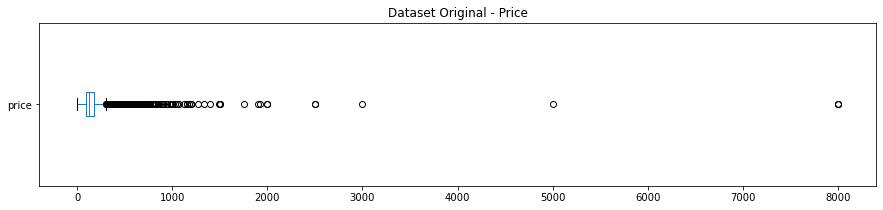

O dataset possui 17825 entradas
939 Entradas acima de 307.5
Representam 5.27% do dataset


In [17]:
#verificando outliers com Box_plot
#price
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - Price')
plt.show()
print("O dataset possui {} entradas".format(df_clean.shape[0]))
print("{} Entradas acima de 307.5".format(len(df_clean[df_clean.price > 307.5])))
print("Representam {:.2f}% do dataset".format((len(df_clean[df_clean.price > 307.5]) / df_clean.shape[0])*100))

##### Q.3.1.3 number_of_reviews

In [18]:
# identificando os outliers para a variável number_of_reviews
q1_numberofreviews = df_clean.number_of_reviews.quantile(.25)
q3_numberofreviews = df_clean.number_of_reviews.quantile(.75)
IQR_numberofreviews = q3_numberofreviews - q1_numberofreviews
print('IQR da variável numberofreviews: ', IQR_numberofreviews)

# definindo os limites                                       
sup_numberofreviews = q3_numberofreviews + 1.5 * IQR_numberofreviews
inf_numberofreviews = q1_numberofreviews - 1.5 * IQR_numberofreviews

print('Limite superior de numberofreviews: ', sup_numberofreviews)
print('Limite inferior de numberofreviews: ', inf_numberofreviews)

IQR da variável numberofreviews:  19.0
Limite superior de numberofreviews:  49.5
Limite inferior de numberofreviews:  -26.5


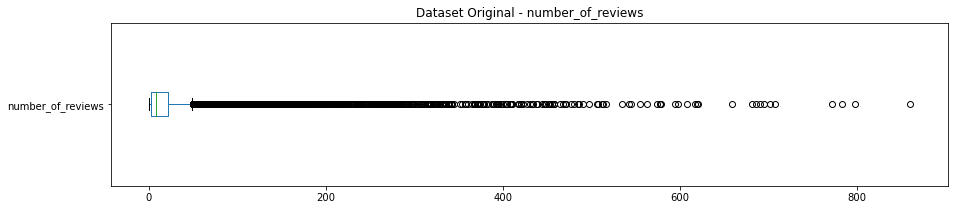

O dataset possui 17825 entradas
1874 Entradas acima de 49.5
Representam 10.51% do dataset


In [19]:
#verificando outliers com Box_plot
#number_of_reviews
fig, ax = plt.subplots(figsize=(15,3))
df_clean.number_of_reviews.plot(kind='box', vert=False);
ax.set_title('Dataset Original - number_of_reviews')
plt.show()
print("O dataset possui {} entradas".format(df_clean.shape[0]))
print("{} Entradas acima de 49.5".format(len(df_clean[df_clean.number_of_reviews > 49.5])))
print("Representam {:.2f}% do dataset".format((len(df_clean[df_clean.number_of_reviews > 49.5]) / df_clean.shape[0])*100))

##### Q.3.1.4 reviews_per_month

In [20]:
# identificando os outliers para a variável reviewspermonth
q1_reviewspermonth = df_clean.reviews_per_month.quantile(.25)
q3_reviewspermonth = df_clean.reviews_per_month.quantile(.75)
IQR_reviewspermonth = q3_reviewspermonth - q1_reviewspermonth
print('IQR da variável reviewspermonth: ', IQR_reviewspermonth)

# definindo os limites                                       
sup_reviewspermonth = q3_reviewspermonth + 1.5 * IQR_reviewspermonth
inf_reviewspermonth = q1_reviewspermonth - 1.5 * IQR_reviewspermonth

print('Limite superior de reviewspermonth: ', sup_reviewspermonth)
print('Limite inferior de reviewspermonth: ', inf_reviewspermonth)

IQR da variável reviewspermonth:  0.42000000000000004
Limite superior de reviewspermonth:  1.1700000000000002
Limite inferior de reviewspermonth:  -0.5100000000000001


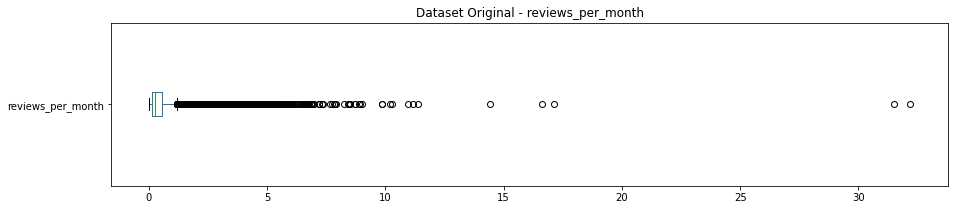

O dataset possui 17825 entradas
1575 Entradas acima de 1.17
Representam 8.84% do dataset


In [21]:
#verificando outliers com Box_plot
#reviewspermonth
fig, ax = plt.subplots(figsize=(15,3))
df_clean.reviews_per_month.plot(kind='box', vert=False);
ax.set_title('Dataset Original - reviews_per_month')
plt.show()
print("O dataset possui {} entradas".format(df_clean.shape[0]))
print("{} Entradas acima de 1.17".format(len(df_clean[df_clean.reviews_per_month > 1.17])))
print("Representam {:.2f}% do dataset".format((len(df_clean[df_clean.reviews_per_month > 1.17]) / df_clean.shape[0])*100))

####Q.3.2 Normalizando Outliers
Já que identificamos *outliers* nas variáveis `minimum_nights`,`price`,`number_of_reviews`e `reviews_per_month` , vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

In [22]:
# remover os *outliers* em um novo DataFrame
df_cleaned = df_clean.copy()
df_cleaned.drop(df_cleaned[df_cleaned.minimum_nights > 4.5].index, axis=0, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned.price > 300].index, axis=0, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned.price == 0.0].index, axis=0, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned.number_of_reviews > 49.5].index, axis=0, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned.reviews_per_month > 1.17].index, axis=0, inplace=True)


##### Agora vamos plotar novamente o histograma original e o limpo para verificar a normalização dos dados.

Foram retiradas 5157 entradas do dataset original de um total de 17825


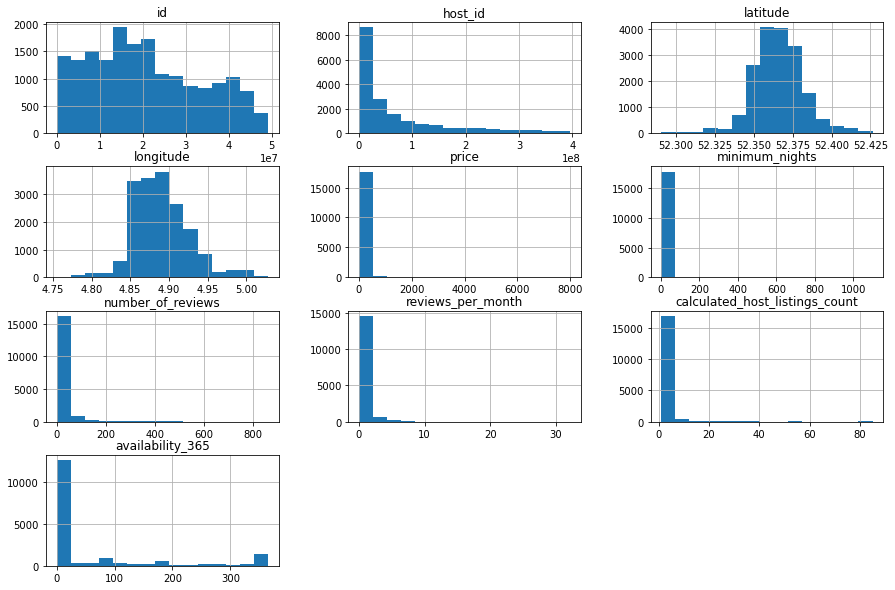

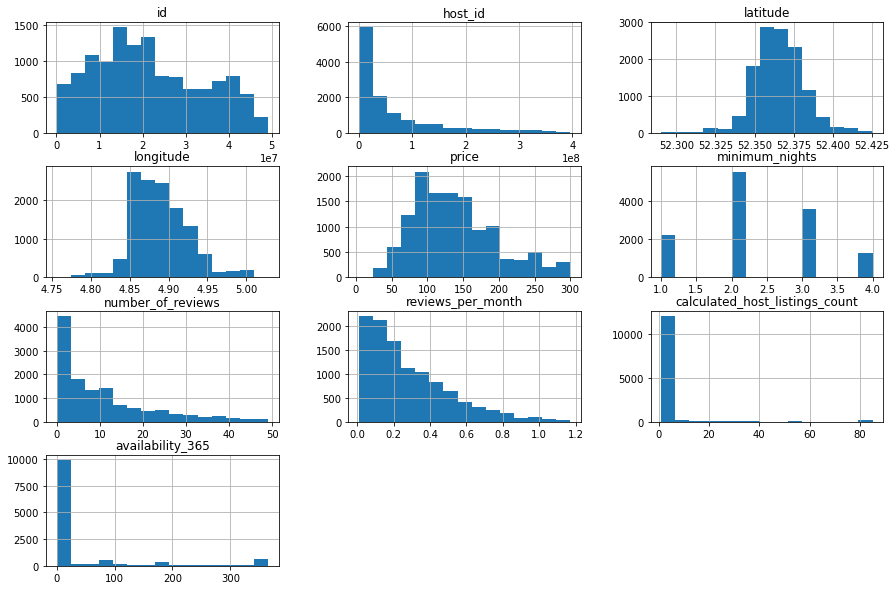

In [23]:
df_clean.hist(bins=15, figsize=(15,10) );
df_cleaned.hist(bins=15, figsize=(15,10));

limpeza= df_clean.shape[0] - df_cleaned.shape[0]
print('Foram retiradas {} entradas do dataset original de um total de {}'.format(limpeza,df_clean.shape[0]))

É possível notar que até após a execução as principais váriaveis do nosso estudo foram normalizadas, com picos e vales mais claros que melhoram a capacidade de análise do nosso *Dataset*. Com esse filtro foram retiradas 5157 entradas da nossa base de dados original.

In [24]:
df_cleaned.describe().round(1)

id      host_id  latitude  longitude    price  minimum_nights  \
count     12668.0      12668.0   12668.0    12668.0  12668.0         12668.0   
mean   21499871.8   68005576.7      52.4        4.9    139.4             2.3   
std    12528884.1   85801220.5       0.0        0.0     59.0             0.9   
min       46386.0       3592.0      52.3        4.8      4.0             1.0   
25%    11859538.2   10452839.0      52.4        4.9     99.0             2.0   
50%    19797891.5   31006110.5      52.4        4.9    129.0             2.0   
75%    31065775.0   88124071.0      52.4        4.9    175.0             3.0   
max    49119460.0  395882585.0      52.4        5.0    300.0             4.0   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count            12668.0            11015.0                         12668.0   
mean                10.5                0.3                             2.7   
std                 11.1                0.2                             9.2   
min                  0.0                0.0                             1.0   
25%                  2.0                0.1                             1.0   
50%                  7.0                0.2                             1.0   
75%                 15.0                0.4                             1.0   
max                 49.0                1.2                            85.0   

       availability_365  
count           12668.0  
mean               43.1  
std                97.8  
min                 0.0  
25%                 0.0  
50%                 0.0  
75%                 1.0  
max               365.0

##### Plotando novamente os Boxplots.


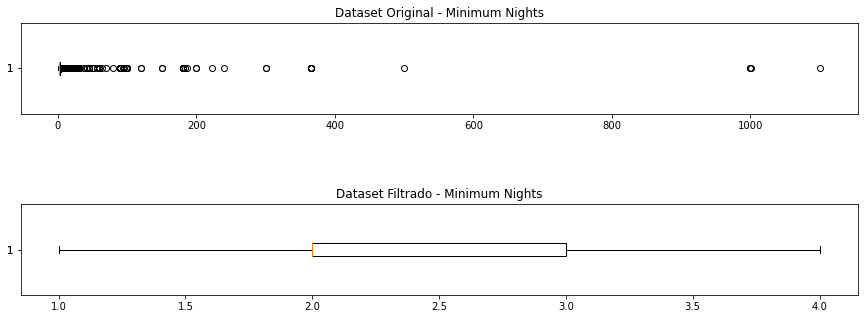

In [25]:
fig, axs = plt.subplots(2, 1, figsize=(15, 5), sharey=True, )
plt.subplots_adjust(hspace=1)
axs[0].boxplot(df_clean.minimum_nights, vert=False)
axs[0].set_title('Dataset Original - Minimum Nights')
axs[1].boxplot(df_cleaned.minimum_nights, vert=False)
axs[1].set_title('Dataset Filtrado - Minimum Nights');

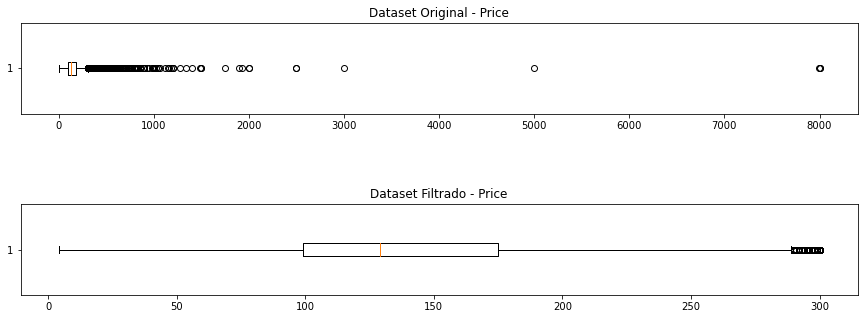

In [26]:
fig, axs = plt.subplots(2, 1, figsize=(15, 5) )
plt.subplots_adjust(hspace=1)
axs[0].boxplot(df_clean.price, vert=False)
axs[0].set_title('Dataset Original - Price')
axs[1].boxplot(df_cleaned.price, vert=False)
axs[1].set_title('Dataset Filtrado - Price');

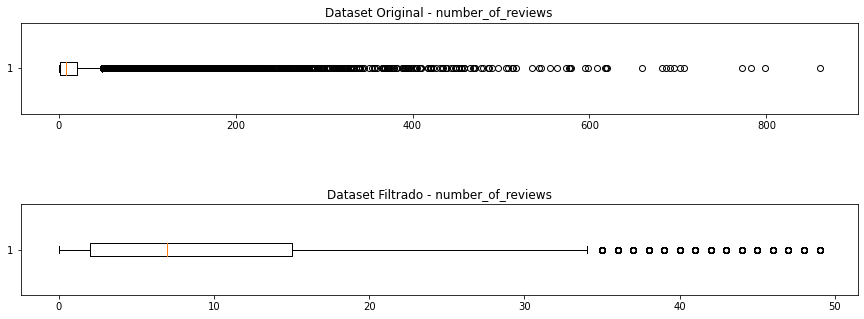

In [27]:
fig, axs = plt.subplots(2, 1, figsize=(15, 5))
plt.subplots_adjust(hspace=1)
axs[0].boxplot(df_clean.number_of_reviews, vert=False)
axs[0].set_title('Dataset Original - number_of_reviews')
axs[1].boxplot(df_cleaned.number_of_reviews, vert=False)
axs[1].set_title('Dataset Filtrado - number_of_reviews');

### **Q4. Qual a correlação existente entre as variáveis?**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [28]:
# criar uma matriz de correlação
corr = df_cleaned[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']].corr()

display(corr)

price  minimum_nights  number_of_reviews  \
price              1.000000        0.140270           0.058510   
minimum_nights     0.140270        1.000000           0.075909   
number_of_reviews  0.058510        0.075909           1.000000   
reviews_per_month  0.022722       -0.078038           0.767313   
availability_365   0.084684       -0.082721           0.057363   

                   reviews_per_month  availability_365  
price                       0.022722          0.084684  
minimum_nights             -0.078038         -0.082721  
number_of_reviews           0.767313          0.057363  
reviews_per_month           1.000000          0.176838  
availability_365            0.176838          1.000000

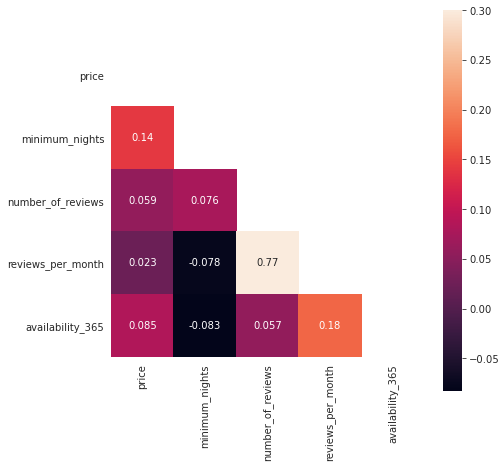

In [29]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 7))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, linecolor='white', annot=True)


Verificando a tabela de correlação é possível notar que imóveis que:
* Quanto maior a disponibilidade durante o ano, maior o número de avaliações total e por mês, e que existe uma correlação possitiva entre ter maior disponibilidade e maior preço.
* Existe uma correlação positiva entre a quantidade de avaliações e o valor da diária
* Exite também uma correlação positiva entre a quantidade de noite mínimas e o preço das unidades

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [30]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_cleaned.room_type.value_counts()

Entire home/apt    10330
Private room        2257
Hotel room            54
Shared room           27
Name: room_type, dtype: int64

In [31]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.779579
Private room       0.210715
Hotel room         0.006957
Shared room        0.002749
Name: room_type, dtype: float64

O tipo de imóvel com mais opcões é o de Casa ou Apartamento completo, com 12.302 entradas, oque representa 78% da quantidade de imóveis de acordo com o filtro utilizado.

### **Q6. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [32]:
# ver a média da coluna `minimum_nights`
df_cleaned.minimum_nights.mean()

2.3130723081780866

In [33]:
# ver quais quantidades de dias mínimos são mais recorrentes
df_cleaned.minimum_nights.value_counts().sort_values(ascending=False)[:15]

2    5562
3    3586
1    2220
4    1300
Name: minimum_nights, dtype: int64

É possível notar que grande parte da nossa amostra se concentra entre 2 e 3 noites, pode ser levantada a hipótese de que a cidade possui um grande fluxo de estadias de menor duração

### **Q7. Qual é a média do do valor para aluguel (price)?**


In [34]:
# ver a média da coluna `price`
df_cleaned.price.mean()

139.4382696558257

In [35]:
# ver qual o valor mais recorrente
df_cleaned.price.value_counts().sort_values(ascending=False)[:15]

150    782
100    651
120    531
200    477
125    407
110    349
250    336
90     327
130    314
80     311
140    275
175    255
95     238
99     233
180    219
Name: price, dtype: int64

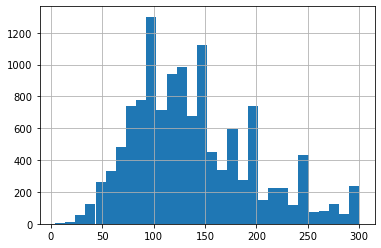

In [36]:
df_cleaned.price.hist(bins=30);

Após a retirada de outliers é possível verificar que o preço mais comum entres as unidades gira entre `100$` e `150$`

### **Q7. Qual a localidade mais cara do dataset?**



In [37]:
# ver preços por bairros, na média
df_cleaned.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Centrum-West                157.859511
Centrum-Oost                154.520670
De Pijp - Rivierenbuurt     149.069640
IJburg - Zeeburgereiland    146.855172
Zuid                        144.824675
Westerpark                  140.668675
De Baarsjes - Oud-West      139.000894
Oud-Oost                    138.280363
Watergraafsmeer             136.360202
Noord-Oost                  133.896739
Name: price, dtype: float64

In [38]:
df_cleaned.groupby(['neighbourhood']).id.count().sort_values(ascending=False)[:10]

neighbourhood
De Baarsjes - Oud-West                    2237
De Pijp - Rivierenbuurt                   1637
Centrum-West                              1146
Westerpark                                 996
Zuid                                       924
Centrum-Oost                               895
Oud-Oost                                   881
Bos en Lommer                              815
Oostelijk Havengebied - Indische Buurt     615
Oud-Noord                                  402
Name: id, dtype: int64

Como não conheço a cidade de Amsterdam acredito que seja interessante verificar onde estão localizadas as unidades disponíveis de acordo com o seu mapa.

*Mapar da Cidade de Amsterdam* 
<img alt="Amsterdam" width="100%" src='https://raw.githubusercontent.com/EricRaniere/Projetos-Estudos/main/DSNP/amsterdam.png'>


In [40]:
# carregar imagem do mapa da cidade
ams_m = plt.imread('https://raw.githubusercontent.com/EricRaniere/DataScienceNaPratica/main/AnaliseAirbnbn/amsterdam.png')


In [41]:
# para plotar um gráfico de dipersão sobre o mapa da cidade é necessário definir as latitudes e longitudes máximas.

BBox = ((df_cleaned.longitude.min(),   df_cleaned.longitude.max(),      
         df_cleaned.latitude.min(), df_cleaned.latitude.max()))

print(BBox)

(4.75571, 5.02799, 52.29034, 52.42534)


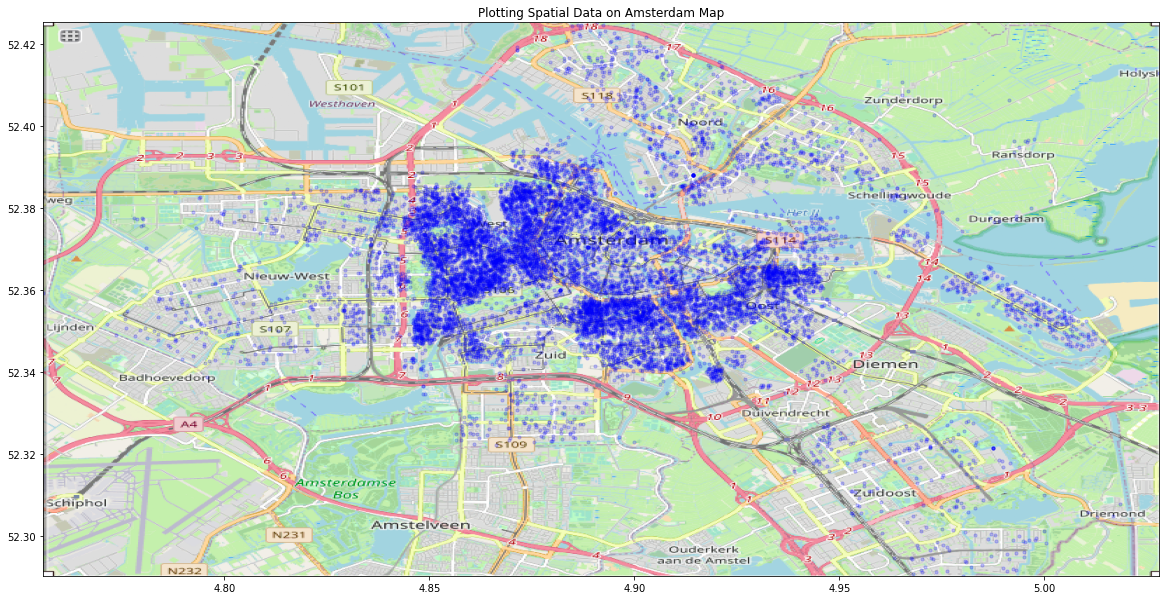

In [42]:
#Para Plotar o gráfico no mapa
fig, ax = plt.subplots(figsize = (20,20))
ax.scatter(df_cleaned.longitude, df_cleaned.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Amsterdam Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ams_m, zorder=0, extent = BBox, aspect= 'equal')

É possível notar que há uma grande concentração de imóveis no centro da cidade. e próximo aos canais fluviáis principais.

Quanto menor for a quantidade de unidades melhor será a visualização no mapa, dessa forma já é possível ver os bairros com a maior quantidade de opções de locação pelo Airbnb em Amsterdam, com destaque do Centro Oeste com uma mancha mais densa no nosso mapa.



## Conclusões


O objetivo desse estudo foi de analisar os dados de um `DataSet`real e gerar uma análise de correlação entre as váriaveis e sobre a distribuição das unidades disponíveis na cidade, de acordo com a sua região.

Acredito que para fim de demonstração que pode ser realizado um filtro agressivo, até para melhorar a visualização do mapa, que mostrou uma grande concentração de unidades no centro da cidade, mas inviabilizou a leitura do mapa.

Chegamos a conclusão, que me parece óbvia, de que quanto mais próximo do centro mais caro é a estadia, mas que existe também uma grande quantidade de oferta nessa região e que por isso existe uma oscilação pequena nos valores principais, grande oferta faz com haja um teto de preço, o preço das unidades se mostrou muito concentrado na faixa entre `100$`e `180$`.

Outra conclusão é a de que a grande maioria das estadias giram em torno de 1 a 4 dias no mínimo, para tando podemos levantar a hipótese de que essa seja a forma mais utilizada na cidades, tendo estadias mais curtas, girando mais rapidamente a quantidade de locações.

A cidade se caracterizou como uma cidade de estadias curtas, nesse `dataset` não é possível verificar a sazonalidade dentro da semana, mas seria uma análise interessante para saber se há uma oscilação entre dias de semana e dias de final de semana para as entrada de `price`, por exemplo. 


### Novo Filtro
Em busca de uma visualização mais limpa, e de um número menor de resultados, vou realizar uma nova redução dos dados e gerar uma nova visualização no mapa.

O novo filtro seguirá os seguintes parâmetros:
* 2 noites de estadia;
* Até $25 de valor de estadia;
* Ter pelo menos 15 reviews;
* Ter pelo menos 1 review por mês.

A diferença entre os filtros foi de  12651 linhas
O Dataset agora possui  17 linhas


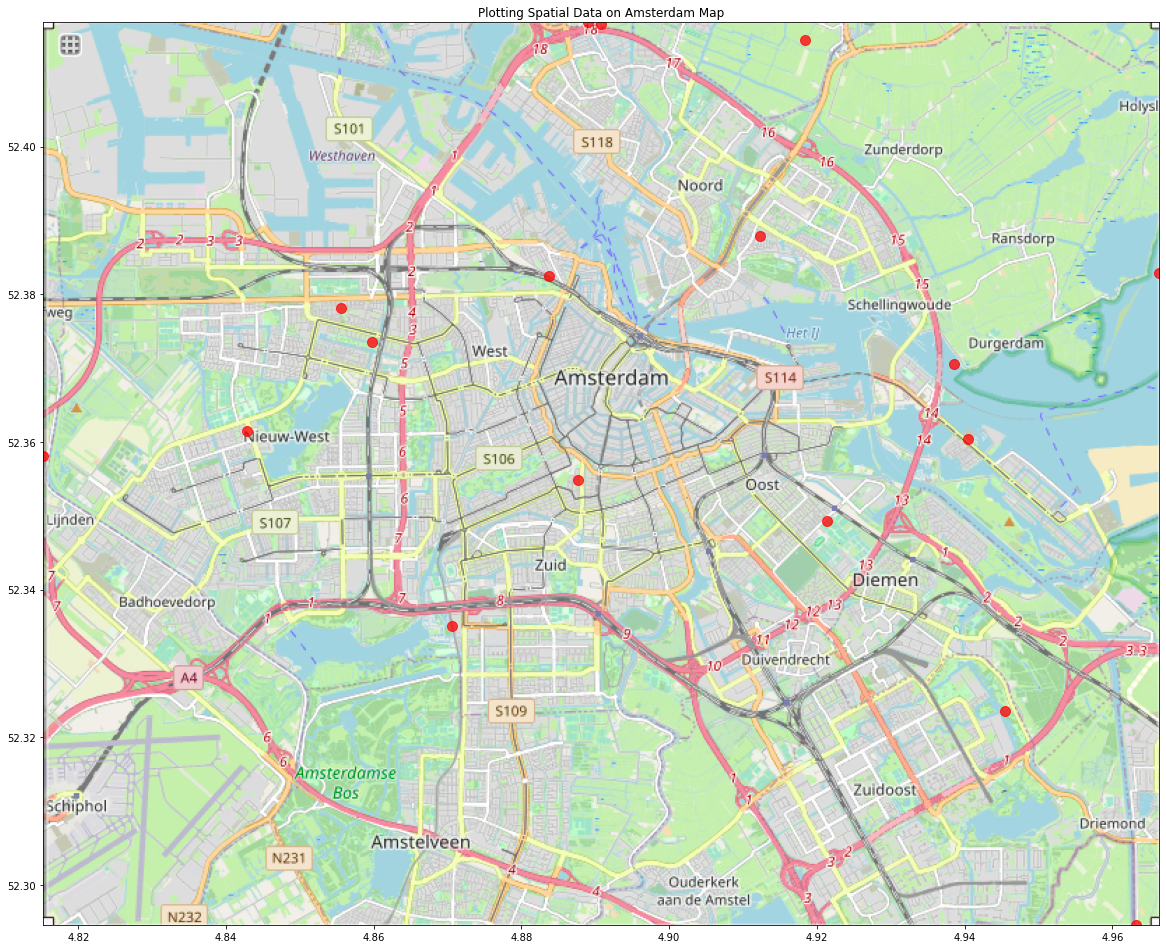

In [43]:
# Gerando novo filtro
df_filtro = df_cleaned.copy()

# Realizando nova subtração de dados
df_filtro.drop(df_filtro[df_filtro.minimum_nights > 2].index, axis=0, inplace=True)
df_filtro.drop(df_filtro[df_filtro.price > 25].index, axis=0, inplace=True)
df_filtro.drop(df_filtro[df_filtro.number_of_reviews > 15].index, axis=0, inplace=True)
df_filtro.drop(df_filtro[df_filtro.reviews_per_month > 1].index, axis=0, inplace=True)

# Para plotar um gráfico de dipersão sobre o mapa da cidade é necessário definir as latitudes e longitudes máximas.
BBox = ((df_filtro.longitude.min(),   df_filtro.longitude.max(),      
         df_filtro.latitude.min(), df_filtro.latitude.max()))

# Verificar a diferença entre os dataset
filtrado = df_cleaned.shape[0] - df_filtro.shape[0]
print("A diferença entre os filtros foi de ",filtrado, "linhas")
print("O Dataset agora possui ",df_filtro.shape[0],"linhas")

# Para plotar o gráfico de dispersão sobre o mapa.
fig, ax = plt.subplots(figsize = (20,20))
ax.scatter(df_filtro.longitude, df_filtro.latitude, zorder=1, alpha= 0.75, c='r', s=100)
ax.set_title('Plotting Spatial Data on Amsterdam Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ams_m, zorder=0, extent = BBox, aspect= 'equal');

In [44]:
df_filtro[['name','neighbourhood','price']]

name  \
2864                                                   C   
7885                           Small house in shittyhood   
9607        A quiet neighborhood close to Amstel Station   
11272                    Cozy room with PRIVATE balcony!   
11368  light,renovated room in North (15m2)+balcony(1...   
13058           Cozy studio in beautiful Amsterdam East!   
13305  Clean and silent room just 20min from Amsterda...   
13488  Amsterdam appartement with Nice view *WOMEN ON...   
13648  De AMSTEL - Unique stay on floating home | Boa...   
14789              Couch to crash on in Amsterdam-North.   
15614           Private room 15 minutes from city center   
15651                       Private Room by Erasmus Park   
15755                            comfort and tranquility   
16256                     Best 1 night stay in Amsterdam   
17330                     Big room in spacious apartment   
17496          Room with view on water in Amsterdam East   
17770  Charming room in the canals + workout & coworking   

                                neighbourhood  price  
2864                  De Pijp - Rivierenbuurt      4  
7885                                Oud-Noord     24  
9607                          Watergraafsmeer     20  
11272                  De Baarsjes - Oud-West     25  
11368                              Noord-West     25  
13058  Oostelijk Havengebied - Indische Buurt     25  
13305                   Gaasperdam - Driemond     22  
13488                              Noord-West     20  
13648                              Noord-Oost     10  
14789                              Noord-West     17  
15614                         Bijlmer-Centrum     18  
15651                           Bos en Lommer     25  
15755                                  Osdorp     25  
16256                  Buitenveldert - Zuidas     15  
17330                             Slotervaart     25  
17496  Oostelijk Havengebied - Indische Buurt     19  
17770                            Centrum-West     21